Top 2 relevant documents using Euclidean Distance:
1. Document: 'Today Rama is not going outside to watch rain'
   Euclidean Distance in LSA space: 0.3866

2. Document: 'Tomorrow Rama is going to watch the rain at sea shore'
   Euclidean Distance in LSA space: 0.4968

Top 2 relevant documents using Cosine Similarity:
1. Document: 'Today Rama is not going outside to watch rain'
   Cosine Similarity in LSA space: 0.9677

2. Document: 'Tomorrow Rama is going to watch the rain at sea shore'
   Cosine Similarity in LSA space: 0.8261

Top 2 relevant documents using Jaccard Similarity:
1. Document: 'Today Rama is not going outside to watch rain'
   Jaccard Similarity: 0.3333

2. Document: 'Tomorrow Rama is going to watch the rain at sea shore'
   Jaccard Similarity: 0.2857

Top 2 relevant documents using Dice Similarity Coefficient:
1. Document: 'Today Rama is not going outside to watch rain'
   Dice Similarity Coefficient: 1.0505

2. Document: 'Tomorrow Rama is going to watch the rain at sea

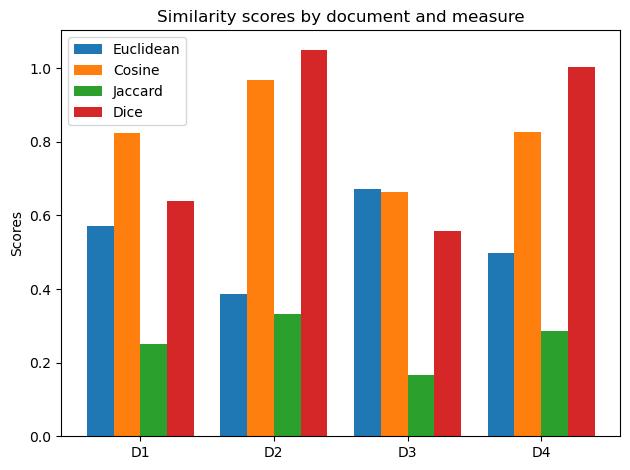

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.metrics import jaccard_score

import numpy as np
import matplotlib.pyplot as plt

# List of documents
documents = [
    "It is going to rain today",
    "Today Rama is not going outside to watch rain",
    "I am going to watch the movie tomorrow with Rama",
    "Tomorrow Rama is going to watch the rain at sea shore"
]

# Query document
query = "Rama watching the rain"

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
query_vec = vectorizer.transform([query])

# Apply Latent Semantic Analysis (LSA)
lsa = TruncatedSVD(n_components=2, random_state=42)
X_lsa = lsa.fit_transform(X)

query_vec_lsa = lsa.transform(query_vec)

# Calculate similarities using Euclidean distance in LSA space
euclidean_distances_lsa = euclidean_distances(query_vec_lsa, X_lsa)

# Calculate similarities using Cosine similarity in LSA space
cosine_similarities_lsa = cosine_similarity(query_vec_lsa, X_lsa).flatten()

# Calculate Jaccard similarity and Dice similarity coefficient
def jaccard_similarity(query_vec, document_vec):
    intersection = np.logical_and(query_vec, document_vec).sum()
    union = np.logical_or(query_vec, document_vec).sum()
    return intersection / union if union != 0 else 0.0

def dice_similarity_coefficient(query_vec, document_vec):
    intersection = np.logical_and(query_vec, document_vec).sum()
    total = query_vec.sum() + document_vec.sum()
    return 2 * intersection / total if total != 0 else 0.0

query_vec_dense = query_vec.toarray()

jaccard_scores = []
dice_coefficients = []

for doc in X.toarray():
    jaccard_score_val = jaccard_similarity(query_vec_dense.flatten(), doc.flatten())
    jaccard_scores.append(jaccard_score_val)
    
    dice_coefficient_val = dice_similarity_coefficient(query_vec_dense.flatten(), doc.flatten())
    dice_coefficients.append(dice_coefficient_val)

# Combine documents with their distances for ranking
documents_with_metrics = list(zip(documents, euclidean_distances_lsa.flatten(), cosine_similarities_lsa, jaccard_scores, dice_coefficients))

# Sort by each similarity measure and print top two relevant documents
top_documents = {}

# Euclidean distance
documents_sorted_by_euclidean = sorted(documents_with_metrics, key=lambda x: x[1])[:2]
top_documents['Euclidean Distance'] = documents_sorted_by_euclidean

# Cosine similarity
documents_sorted_by_cosine = sorted(documents_with_metrics, key=lambda x: x[2], reverse=True)[:2]
top_documents['Cosine Similarity'] = documents_sorted_by_cosine

# Jaccard similarity
documents_sorted_by_jaccard = sorted(documents_with_metrics, key=lambda x: x[3], reverse=True)[:2]
top_documents['Jaccard Similarity'] = documents_sorted_by_jaccard

# Dice similarity coefficient
documents_sorted_by_dice = sorted(documents_with_metrics, key=lambda x: x[4], reverse=True)[:2]
top_documents['Dice Similarity Coefficient'] = documents_sorted_by_dice

# Print top two relevant documents for each measure
for measure, docs in top_documents.items():
    print(f"Top 2 relevant documents using {measure}:")
    for i, (doc, dist, sim, jaccard, dice) in enumerate(docs, 1):
        print(f"{i}. Document: '{doc}'")
        if measure == 'Euclidean Distance':
            print(f"   Euclidean Distance in LSA space: {dist:.4f}")
        elif measure == 'Cosine Similarity':
            print(f"   Cosine Similarity in LSA space: {sim:.4f}")
        elif measure == 'Jaccard Similarity':
            print(f"   Jaccard Similarity: {jaccard:.4f}")
        elif measure == 'Dice Similarity Coefficient':
            print(f"   Dice Similarity Coefficient: {dice:.4f}")
        print()

# Visualization using bar charts
labels = ['D1', 'D2', 'D3', 'D4']

#Extracts the euclidean_distance, cosine_similarity, jaccard_score, dice_coefficient from each tuple and creates a list of these distances.
euclidean_scores = [dist for _, dist, _, _, _ in documents_with_metrics]
cosine_scores = [sim for _, _, sim, _, _ in documents_with_metrics]
jaccard_scores = [jaccard for _, _, _, jaccard, _ in documents_with_metrics]
dice_scores = [dice for _, _, _, _, dice in documents_with_metrics]

x = np.arange(len(labels))
width = 0.2

fig, axis = plt.subplots()
rects1 = axis.bar(x - 1.5*width, euclidean_scores, width, label='Euclidean')
rects2 = axis.bar(x - 0.5*width, cosine_scores, width, label='Cosine')
rects3 = axis.bar(x + 0.5*width, jaccard_scores, width, label='Jaccard')
rects4 = axis.bar(x + 1.5*width, dice_scores, width, label='Dice')

axis.set_ylabel('Scores')
axis.set_title('Similarity scores by document and measure')
axis.set_xticks(x)
axis.set_xticklabels(labels)
axis.legend()

fig.tight_layout()
plt.show()
